# Data Visualization Exercise - Penguin Dataset
### Makeover Monday Weekly Challenge
### Coding Dojo
### Data Science and Machine Learning Bootcamp
### Week 3
### Braden Anderson 

In [308]:
# The goals of this notebook are the following:
# 1. To explore the penguin dataset and the relationships between various penguin features. 
# 2. To explore several different data visualization libraries and understand some strengths and weaknesses of each.
# 3. To offer some potential methods of improving the Makeover Monday Penguin Dataset plot found here: https://data.world/makeovermonday/2020w28

# Note: Bonus for those who stick with me to the end of this notebook, I saved my favorite plot for last! 

In [309]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [310]:
# Ensure the matplotlin cyberpunk plot style is installed before trying to import it. 
!pip install mplcyberpunk;

# Uncomment this line if ProfileReport is not already installed.
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [311]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import mplcyberpunk
from plotly.subplots import make_subplots
from PIL import Image
from bokeh.plotting import figure, output_file, show
from bokeh.transform import factor_cmap, factor_mark
from bokeh.models import ColumnDataSource, Title, Legend, LegendItem, HoverTool
from bokeh.io import output_notebook, push_notebook, show
from bokeh.palettes import Category10_3
from pandas_profiling import ProfileReport

%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})

In [312]:
# Read in the Penguin_data excel file into the Penguin_df data frame.
filename = '/content/drive/MyDrive/Programming/Colab Notebooks/Coding_Dojo/Week_3/Penguin_data.xlsx'
Penguin_df = pd.read_excel(filename)

In [313]:
# Take a look at the first five lines of the Penguin_df data frame.
Penguin_df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [314]:
# Uncomment these lines to run a ProfileReport on the Penguin_df dataframe. 
#profile = ProfileReport(Penguin_df)
#profile.to_notebook_iframe()

In [315]:
# Rename columns to make the names more pythonic. Spaces are replaced with underscores and parenthesis are removed. 
Penguin_df.rename(columns={"Sample Number":"Sample_Number", "Individual ID":"Individual_ID", "Clutch Completion":"Clutch_Completion", "Date Egg":"Date_Egg",
                           "Culmen Length (mm)":"Culmen_Length_mm","Culmen Depth (mm)":"Culmen_Depth_mm","Flipper Length (mm)":"Flipper_Length_mm",
                           "Body Mass (g)":"Body_Mass_g","Delta 15 N (o/oo)":"Delta_15_N_o/oo","Delta 13 C (o/oo)":"Delta_13_C_o/oo"}, inplace=True)

In [316]:
# For N/A values in Delta 15, Delta 13 or Sex columns, flag the field by filling it in with "Missing".
Penguin_df.loc[:, ['Delta_15_N_o/oo', 'Delta_13_C_o/oo', 'Sex']] = Penguin_df.loc[:, ['Delta_15_N_o/oo', 'Delta_13_C_o/oo', 'Sex']].fillna(value="Missing")

# Some observations had a period "." entered in the "Sex" feature column. This is not a valid input for this feature, therefore we need to update the
# "Sex" feature to be "Missing" for any observations where this occured.
Penguin_df.loc[Penguin_df['Sex'] == ".", 'Sex'] = "Missing"

# For observations with NaN in the comment field, fill in the value with "No Comments".
Penguin_df['Comments'] = Penguin_df['Comments'].fillna(value="No Comment")

In [317]:
# View the rows in the Penguin_df dataframe that have a missing value for Body Mass
Penguin_df.loc[Penguin_df['Body_Mass_g'].isna() == True]

,studyName,Sample_Number,Species,Region,Island,Stage,Individual_ID,Clutch_Completion,Date_Egg,Culmen_Length_mm,Culmen_Depth_mm,Flipper_Length_mm,Body_Mass_g,Sex,Delta_15_N_o/oo,Delta_13_C_o/oo,Comments
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,Missing,Missing,Missing,Adult not sampled.
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,2009-12-01,NaN,NaN,NaN,NaN,Missing,Missing,Missing,Adult not sampled. Nest never observed with fu...


In [318]:
# Notice that there are still two rows that contain NaN values (shown above). 
# Within these two rows, notice multiple data fields are missing ("Culmen Length, Culmen Depth, Flipper Length, Body Mass").
# We simply do not have enough information on these two penguins to plot any data, therefore we will drop them from the dataset before plotting.
Penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   studyName          344 non-null    object 
 1   Sample_Number      344 non-null    int64  
 2   Species            344 non-null    object 
 3   Region             344 non-null    object 
 4   Island             344 non-null    object 
 5   Stage              344 non-null    object 
 6   Individual_ID      344 non-null    object 
 7   Clutch_Completion  344 non-null    object 
 8   Date_Egg           344 non-null    object 
 9   Culmen_Length_mm   342 non-null    float64
 10  Culmen_Depth_mm    342 non-null    float64
 11  Flipper_Length_mm  342 non-null    float64
 12  Body_Mass_g        342 non-null    float64
 13  Sex                344 non-null    object 
 14  Delta_15_N_o/oo    344 non-null    object 
 15  Delta_13_C_o/oo    344 non-null    object 
 16  Comments           344 non

In [319]:
# Drop the two observations that are missing several features.
Penguin_df.dropna(axis=0, how="any", inplace=True)

In [320]:
# Verify we no longer have any observations containing NaN values.
Penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   studyName          342 non-null    object 
 1   Sample_Number      342 non-null    int64  
 2   Species            342 non-null    object 
 3   Region             342 non-null    object 
 4   Island             342 non-null    object 
 5   Stage              342 non-null    object 
 6   Individual_ID      342 non-null    object 
 7   Clutch_Completion  342 non-null    object 
 8   Date_Egg           342 non-null    object 
 9   Culmen_Length_mm   342 non-null    float64
 10  Culmen_Depth_mm    342 non-null    float64
 11  Flipper_Length_mm  342 non-null    float64
 12  Body_Mass_g        342 non-null    float64
 13  Sex                342 non-null    object 
 14  Delta_15_N_o/oo    342 non-null    object 
 15  Delta_13_C_o/oo    342 non-null    object 
 16  Comments           342 non

## Data Visualization using Plotly 

In [321]:
# This plot shows Penguin Body mass vs. Flipper Length for Adelie, Chinstrap and Gentoo penguins. 
# This plot improves upon the MakeoverMonday plot by adding interactivity. When hovering over a data point information from several additional features associated
# associated with that data point (observation) are interactively displayed. This allows the viewer to easily dive deeper into data points of interest. 
# This plot also expands upon the original by adding trendlines for each of the penguin species categories.

fig = px.scatter(Penguin_df, x="Flipper_Length_mm", y="Body_Mass_g", size="Culmen_Length_mm", color="Species",
           hover_name="Individual_ID", log_x=True, size_max=10, title="Body Mass vs Flipper Length for Adelie, Chinstrap and Gentoo Penguins",
           template='plotly_dark', hover_data=['Species', 'Body_Mass_g', 'Flipper_Length_mm', 'Culmen_Length_mm', 'Culmen_Depth_mm',
                                        'Sex', 'Region', 'Island'], trendline='ols')
fig.show()

# Uncomment this line if you wish to save the plot as an HTML file.
#fig.write_html("Penguin_Plot.html")

In [322]:
# This plot has the same axes as the plot above. Some plot settings were changed to provide a slightly different view on the data.
# An extra dimension has been added by changing the symbol shape based on the island the bird is from. 
# Also, to reduce visual clutter, trendlines have been removed. 

fig = px.scatter(Penguin_df, x="Flipper_Length_mm", y="Body_Mass_g", size="Culmen_Length_mm", color="Species", symbol="Island",
           hover_name="Individual_ID", log_x=True, size_max=10, title="Body Mass vs Flipper Length for Adelie, Chinstrap and Gentoo Penguins",
           template='plotly_dark', hover_data=['Species', 'Body_Mass_g', 'Flipper_Length_mm', 'Culmen_Length_mm', 'Culmen_Depth_mm',
                                        'Sex', 'Region', 'Island'])

fig.show()

# Uncomment this line if you wish to save the plot as an HTML file.
#fig.write_html("Penguin_Plot2.html")

In [323]:
# This is an alternative plot used to further investigate the relationships in the Penguin dataset. 
# This plot displays culmen (beak) length vs flipper length for all three species of penguins. 
# Additioanlly, box plots have been added to both the x and y axis to show the five number summary for each variable. 

fig = px.scatter(Penguin_df, x="Flipper_Length_mm", y="Culmen_Length_mm", size="Body_Mass_g", color="Species",
           hover_name="Individual_ID", log_x=True, size_max=10, title="Flipper length and culmen length for Adelie, Chinstrap and Gentoo Penguins", template='plotly_dark', marginal_y = "box",
           marginal_x = "box")

fig.show()

# Uncomment this line if you wish to save the plot as an HTML file.
#fig.write_html("Penguin_Plot3.html")

In [368]:
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
# In the plots above, we explored the plotly.express high level API which is excellent for rapid figure generation.
# In this plot, we take a look at the plotly.graph_objects and plotly.subplots APIs which are lower level interfaces to plotly.
# As you can see, the language in these lower level API's is less expressive and more difficult to work with, requiring more
# code to generate figures. If plotly.express will meet your needs, that seems like the better option, however the lower level 
# control may be necessary or preferred in some situations for highly specialized plots. 
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Create subset dataframes for every combination of species and gender 
female_Adelie_df = Penguin_df[(Penguin_df['Sex'] == 'FEMALE') & (Penguin_df['Species'] == "Adelie Penguin (Pygoscelis adeliae)")]
female_Chinstrap_df = Penguin_df[(Penguin_df['Sex'] == 'FEMALE') & (Penguin_df['Species'] == "Chinstrap penguin (Pygoscelis antarctica)")]
female_Gentoo_df = Penguin_df[(Penguin_df['Sex'] == 'FEMALE') & (Penguin_df['Species'] == "Chinstrap penguin (Pygoscelis antarctica)")]

unknown_Adelie_df = Penguin_df[(Penguin_df['Sex'] == 'Missing') & (Penguin_df['Species'] == "Adelie Penguin (Pygoscelis adeliae)")]
unknown_Chinstrap_df = Penguin_df[(Penguin_df['Sex'] == 'Missing') & (Penguin_df['Species'] == "Chinstrap penguin (Pygoscelis antarctica)")]
unknown_Gentoo_df = Penguin_df[(Penguin_df['Sex'] == 'Missing') & (Penguin_df['Species'] == "Gentoo penguin (Pygoscelis papua)")]

male_Adelie_df = Penguin_df[(Penguin_df['Sex'] == 'MALE') & (Penguin_df['Species'] == "Adelie Penguin (Pygoscelis adeliae)")]
male_Chinstrap_df = Penguin_df[(Penguin_df['Sex'] == 'MALE') & (Penguin_df['Species'] == "Chinstrap penguin (Pygoscelis antarctica)")]
male_Gentoo_df = Penguin_df[(Penguin_df['Sex'] == 'MALE') & (Penguin_df['Species'] == "Gentoo penguin (Pygoscelis papua)")]

# ----------------------------------------------------------------------------------------------------------------------------------------------------------

# Create a tuple of figure title names. These will be the titles for the six subplots.
fig_titles = ("Female Adelie Penguins Body Mass vs Flipper Length", "Male Adelie Penguins Body Mass vs Flipper Length", 
              "Female Gentoo Penguins Body Mass vs Flipper Length", "Male Gentoo Penguins Body Mass vs Flipper Length",
              "Female Chinstrap Penguins Body Mass vs Flipper Length", "Male Chinstrap Penguins Body Mass vs Flipper Length")

# Generate six subplots in a 3x2 layout. 
fig = make_subplots(rows=3, cols=2, subplot_titles=fig_titles, shared_yaxes='all', shared_xaxes='all', horizontal_spacing=0.02)

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------- Row 1  -- Adelie Penguins ------------------------------------------------------------------------

fig.add_trace(go.Scattergl(x=female_Adelie_df['Flipper_Length_mm'], y=female_Adelie_df['Body_Mass_g'], mode='markers', name="Female Adelie", marker={'color': 'blue'}), row=1, col=1)
fig.add_trace(go.Scattergl(x=unknown_Adelie_df['Flipper_Length_mm'], y=unknown_Adelie_df['Body_Mass_g'], mode='markers', name="Adelie Unknown Sex", marker={'color': 'yellow'},
                           showlegend=False), row=1, col=1)

#fig.update_xaxes(title_text="Flipper Length", row=1, col=1)
fig.update_yaxes(title_text="Body Mass", row=1, col=1)

fig.add_trace(go.Scattergl(x=male_Adelie_df['Flipper_Length_mm'], y=male_Adelie_df['Body_Mass_g'], mode='markers', name="Male Adelie", marker={'color': 'blue'}), row=1, col=2)
fig.add_trace(go.Scattergl(x=unknown_Adelie_df['Flipper_Length_mm'], y=unknown_Adelie_df['Body_Mass_g'], mode='markers', name="Adelie Unknown Sex", marker={'color': 'yellow'}), row=1, col=2)

#fig.update_xaxes(title_text="Flipper Length", row=1, col=2)
#fig.update_yaxes(title_text="Body Mass", row=1, col=2)

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------- Row 2  -- Gentoo Penguins ------------------------------------------------------------------------

fig.add_trace(go.Scattergl(x=female_Gentoo_df['Flipper_Length_mm'], y=female_Gentoo_df['Body_Mass_g'], mode='markers', name="Female Gentoo", marker={'color': 'green'}), row=2, col=1)
fig.add_trace(go.Scattergl(x=unknown_Gentoo_df['Flipper_Length_mm'], y=unknown_Gentoo_df['Body_Mass_g'], mode='markers', name="Gentoo Unknown Sex", marker={'color': 'cyan'},
                           showlegend=False), row=2, col=1)

#fig.update_xaxes(title_text="Flipper Length", row=2, col=1)
fig.update_yaxes(title_text="Body Mass", row=2, col=1)

fig.add_trace(go.Scattergl(x=male_Gentoo_df['Flipper_Length_mm'], y=male_Gentoo_df['Body_Mass_g'], mode='markers', name="Male Gentoo",  marker={'color': 'green'}), row=2, col=2)
fig.add_trace(go.Scattergl(x=unknown_Gentoo_df['Flipper_Length_mm'], y=unknown_Gentoo_df['Body_Mass_g'], mode='markers', name="Gentoo Unknown Sex", marker={'color': 'cyan'}), row=2, col=2)

#fig.update_xaxes(title_text="Flipper Length", row=2, col=2)
#fig.update_yaxes(title_text="Body Mass", row=2, col=2)

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------- Row 3  -- Chinstrap Penguins ------------------------------------------------------------------------

fig.add_trace(go.Scattergl(x=female_Chinstrap_df['Flipper_Length_mm'], y=female_Chinstrap_df['Body_Mass_g'], mode='markers', name="Female Chinstrap", marker={'color': 'red'}), row=3, col=1)
fig.add_trace(go.Scattergl(x=unknown_Chinstrap_df['Flipper_Length_mm'], y=unknown_Chinstrap_df['Body_Mass_g'], mode='markers', name="Chinstrap Unknown Sex", marker={'color': 'red'}), row=3, col=1)

fig.update_xaxes(title_text="Flipper Length", row=3, col=1)
fig.update_yaxes(title_text="Body Mass", row=3, col=1)

fig.add_trace(go.Scattergl(x=male_Chinstrap_df['Flipper_Length_mm'], y=male_Chinstrap_df['Body_Mass_g'], mode='markers', name="Male Chinstrap", marker={'color': 'red'}), row=3, col=2)
fig.add_trace(go.Scattergl(x=unknown_Chinstrap_df['Flipper_Length_mm'], y=unknown_Chinstrap_df['Body_Mass_g'], mode='markers', name="Chinstrap Unknown Sex", marker={'color': 'red'}), row=3, col=2)

fig.update_xaxes(title_text="Flipper Length", row=3, col=2)
#fig.update_yaxes(title_text="Body Mass", row=3, col=2)

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------

fig.show()

# Some observations that can be made from this plot:

# 1. Body Mass vs Flipper Length doesn't seem like it will reliably indicate gender for an Adelie Penguin. 
# 2. By plotting Body Mass vs Flipper Length for Gentoo Penguins, it seems obvious that the unknown Sex penguins are Males. 
# 3. There are not any unknown sex Chinstrap Penguins.

## Data Visualization using Seaborn 

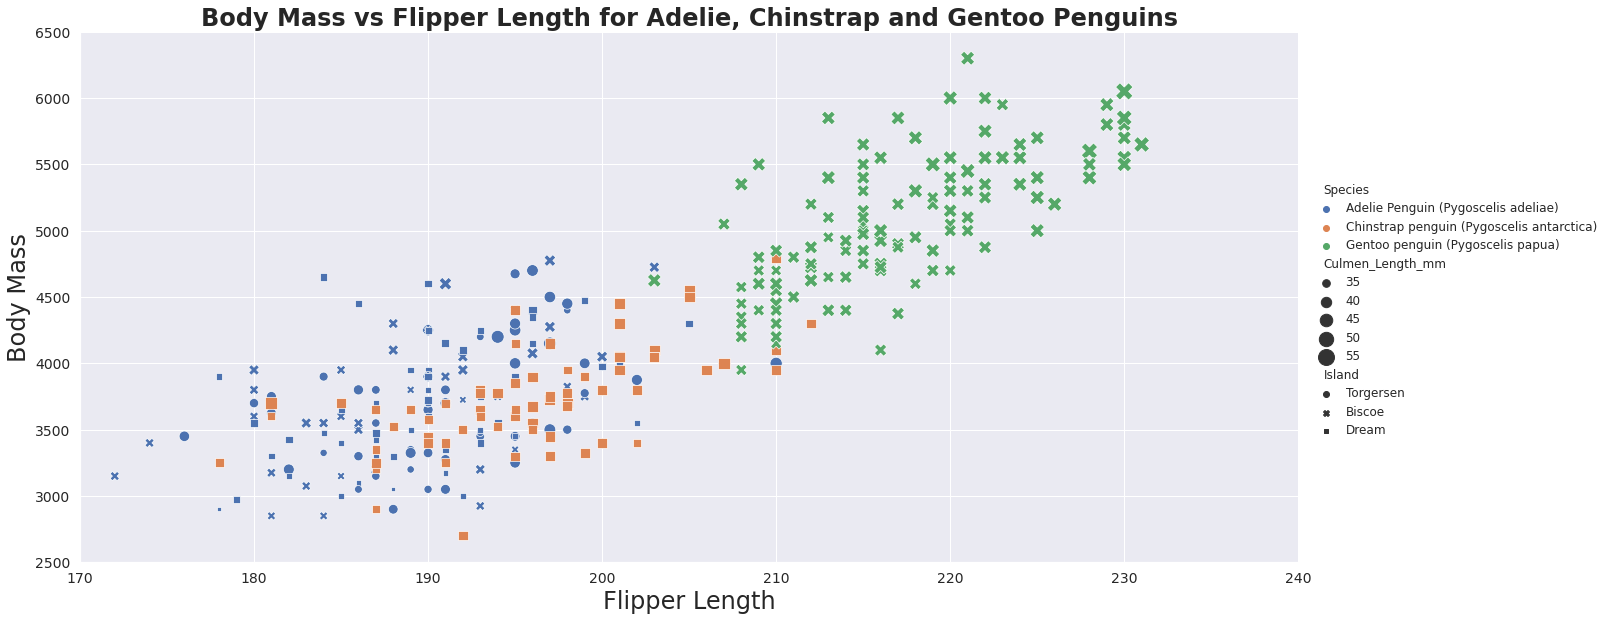

In [326]:
# -------------------------------------------------------------------------------------------------------------------------------------------
# This plot expands upon the MakeoverMonday plot by incorporating an additional penguin feature into the plot through varying symbol sizes.
# The size of each marker on the plot is proportional to the Culmen (beak) length for the given penguin. 
# -------------------------------------------------------------------------------------------------------------------------------------------

sns.set_theme(style="darkgrid")

# Create a "relplot" which is a figure level function that will interact with Matplotlib through the Seaborn object "Facegrid" (replot returns a facetgrid).
# The default type of relational plot is a scatter plot, which means relplot will create a scatterplot if "kind" is not specified. 
# Therefore, this line will create a scatterplot that displays Penguin Body Mass vs Flipper Length, where marker color is determined by species, 
# marker shape is determined by the island the bird is from, and marker size is determined by the birds relative Culmen (beak) length. 
g = sns.relplot(x="Flipper_Length_mm", y='Body_Mass_g', data=Penguin_df, hue='Species', style='Island', size='Culmen_Length_mm', sizes=(30,300), height=8, aspect=2.25)

# set a title for the figure using the .set_title axis level function.
g.ax.set_title("Body Mass vs Flipper Length for Adelie, Chinstrap and Gentoo Penguins", fontsize="24", fontweight="bold")
g.ax.set_xlim(left=170, right=240)

# Performing some plot customization/formatting using figure level functions. 
g.set_xlabels("Flipper Length", fontsize=24)
g.set_ylabels("Body Mass", fontsize=24)
g.set_xticklabels(labels = [170, 180, 190, 200, 210, 220, 230, 240], fontsize=14)
g.set_yticklabels(fontsize=14)

# ---------------------------------------------------------------------------------------------------------
# ---------------- Additional info to aid in reading the plot ---------------------------------------------
#
# Marker Types
# "circle" ---> The Penguin is from the island Torgersen
# "X"      ---> The Penguin is from the island Biscoe
# "Square" ---> The Penguin is from the island Dream
#
# Colors 
# Blue     ---> Species is Adelie
# Orange   ---> Species is Chinstrap
# Green    ---> Species is Gentoo
#
# Marker Sizes are proportional to the penguins beak length.
# -----------------------------------------------------------------------------------------------------------

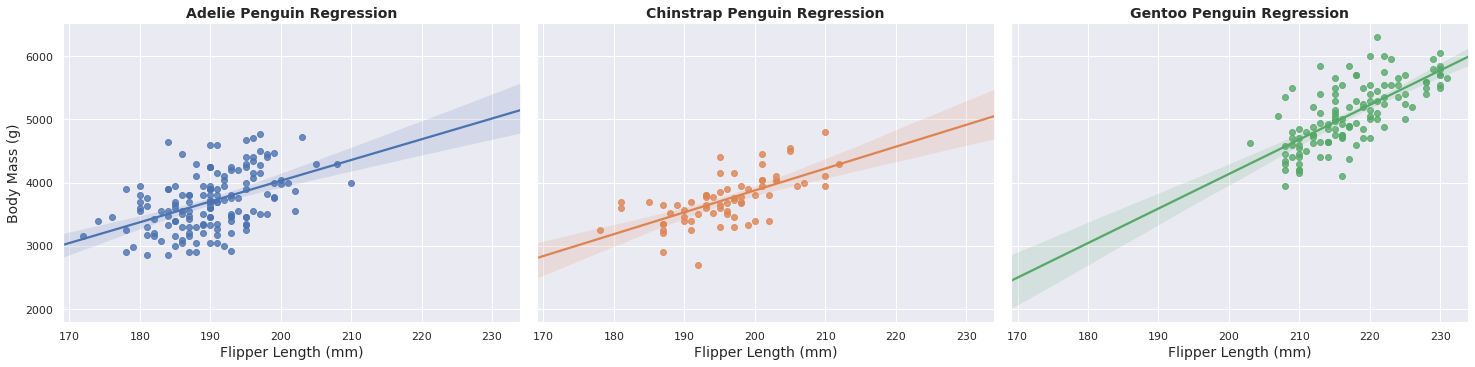

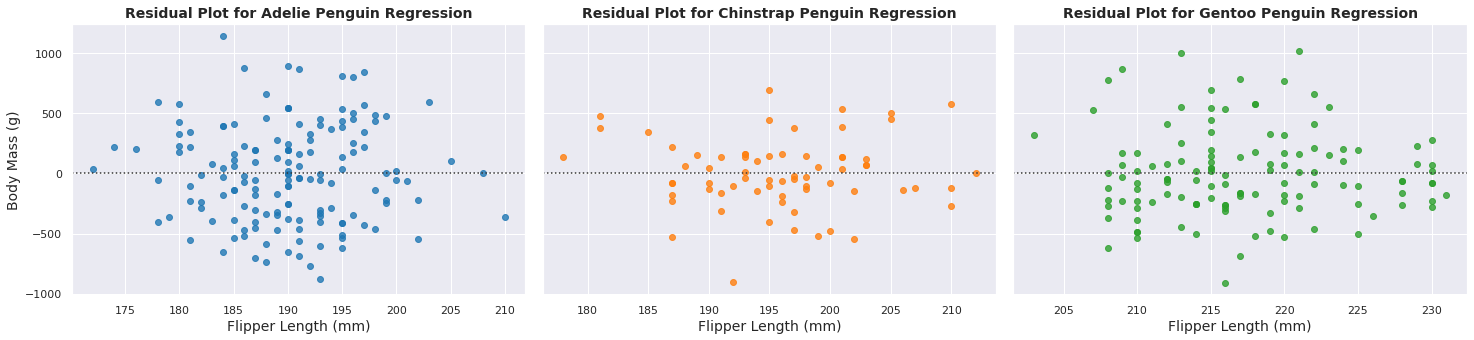

In [327]:
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------
# The output of this cell is actually two separate figures, displayed one on top of the other to easily compare the regression line and associated residual plot.
# 
# The top figure is created using the Seaborn figure level regression line modeling function lmplot. The use of this function restricts us from combining the
# two rows of graphs into a single figure. Per the Seaborn documentation "figure level functions cannot (easily) be composed with other plots. By design they "own"
# their own figure, including its initialization, so there's no notion of using a figure-level function to draw a plot onto an existing axes." 
#
# Seaborn does offer a different function, "regplot" which allows for creating a scatter plot and regression line in an existing figure and axis by specifying
# an 'ax' parameter. However, regplot does not support hue and column parameters, therefore creating the top row of graphs shown below by using regplog would
# require three separate function calls, each on a different subset of data (thus requiring significantly more code to plot the three graphs). To explore
# this tradeoff, a solution of this type is given in the next cell. 
# 
# --------------------------------------------------------------------------------------------------------------------------------------------------------------

# Use Seaborns lmplot function to create a scatter plot and regression line. lmplot is a figure level function that uses regplot() and Facetgrid() under the hood.  
lm = sns.lmplot(x="Flipper_Length_mm", y="Body_Mass_g", data=Penguin_df, scatter=True, col="Species", hue="Species", truncate=False, height=5, aspect = 1.36)

# Manually grab references to the figure and axes that was created by lmplot. 
lm_fig = lm.fig
lm_fig_a0 = lm_fig.axes[0]

# Use axis level functions to to set the title and axis labels for each of the three "Facets" (axes) created by lmplot.  
lm_fig_a0.set_title("Adelie Penguin Regression", fontsize=14, fontweight="bold")
lm_fig_a0.set_ylabel("Body Mass (g)", fontsize=14)
lm_fig_a0.set_xlabel("Flipper Length (mm)", fontsize=14)

lm_fig_a1 = lm_fig.axes[1]
lm_fig_a1.set_title("Chinstrap Penguin Regression", fontsize=14, fontweight="bold")
lm_fig_a1.set_xlabel("Flipper Length (mm)", fontsize=14)

lm_fig_a2 = lm_fig.axes[2]
lm_fig_a2.set_title("Gentoo Penguin Regression", fontsize=14, fontweight="bold")
lm_fig_a2.set_xlabel("Flipper Length (mm)", fontsize=14)

# Create new dataframes for each penguin species. These will be used to create residual plots for the datapoints in each species category. 
adelie_df = Penguin_df[Penguin_df['Species'] == "Adelie Penguin (Pygoscelis adeliae)"]
chinstrap_df = Penguin_df[Penguin_df['Species'] == "Chinstrap penguin (Pygoscelis antarctica)"]
gentoo_df = Penguin_df[Penguin_df['Species'] == "Gentoo penguin (Pygoscelis papua)"]

# Create a figure for the bottom three residual plots. 
fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(25.0,5.0), gridspec_kw = {'wspace':0.038, 'hspace':1.0})

# ------------------------------------------------------------------------------------------------------
# Create each residual plot one at a time. Add each plot to one of the axes in the figure created 
# in the line above, and then use axes level functions to specify the title and axis labels.
# ------------------------------------------------------------------------------------------------------
sns.residplot(x="Flipper_Length_mm", y="Body_Mass_g", data=adelie_df, ax=axs[0], color="tab:blue")
axs[0].set_title("Residual Plot for Adelie Penguin Regression", fontsize=14, fontweight="bold")
axs[0].set_ylabel("Body Mass (g)", fontsize=14)
axs[0].set_xlabel("Flipper Length (mm)", fontsize=14)

sns.residplot(x="Flipper_Length_mm", y="Body_Mass_g", data=chinstrap_df, ax=axs[1], color="tab:orange")
axs[1].set_title("Residual Plot for Chinstrap Penguin Regression", fontsize=14, fontweight="bold")
axs[1].set_ylabel("")
axs[1].set_xlabel("Flipper Length (mm)", fontsize=14)

sns.residplot(x="Flipper_Length_mm", y="Body_Mass_g", data=gentoo_df, ax=axs[2], color="tab:green")
axs[2].set_title("Residual Plot for Gentoo Penguin Regression", fontsize=14, fontweight="bold")
axs[2].set_ylabel("")
axs[2].set_xlabel("Flipper Length (mm)", fontsize=14)

# uncomment this line and run the cell to save a figure
plt.savefig('regression_and_residuals_in_two_figures.png')

Text(0.5, 0, 'Flipper Length (mm)')

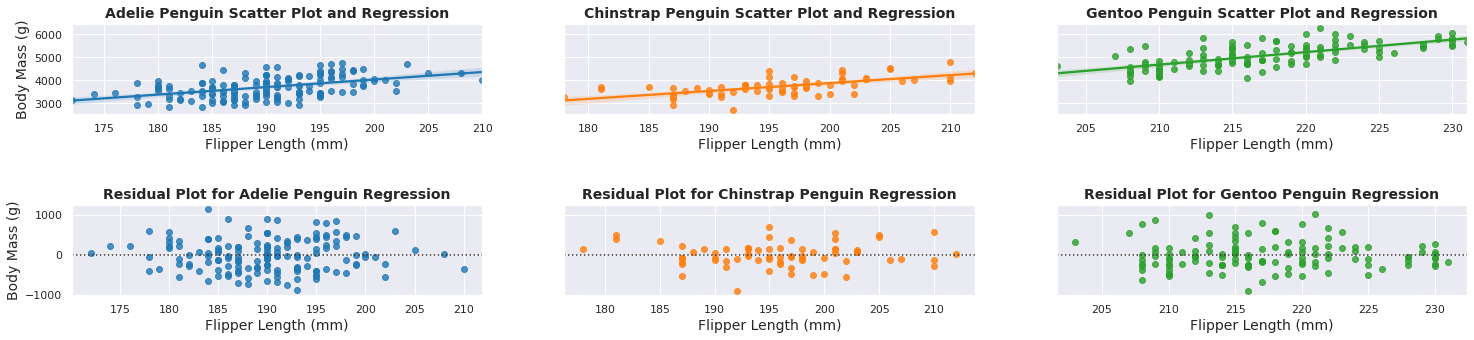

In [328]:
# ------------------------------------------------------------------------------------------------------------------------------- 
# This cell creates a similar output to the one above, only this time the output is a single figure.
# ------------------------------------------------------------------------------------------------------------------------------- 

# Create new dataframes for each penguin species. These will be used to create residual plots for the datapoints in each species category. 
adelie_df = Penguin_df[Penguin_df['Species'] == "Adelie Penguin (Pygoscelis adeliae)"]
chinstrap_df = Penguin_df[Penguin_df['Species'] == "Chinstrap penguin (Pygoscelis antarctica)"]
gentoo_df = Penguin_df[Penguin_df['Species'] == "Gentoo penguin (Pygoscelis papua)"]

# Create a figure and axis for the regression and residual plots.
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25.0,5.0), sharey='row', gridspec_kw = {'wspace':0.2, 'hspace':1.0})

# ------------------------------------------------------------------------------------------------------------------------------- 
# Use Seaborns axis level regplot function to create scatter plots and regression lines for each penguin species individually. 
# Also specify which axis in the (2x3) figure each one should plot in, and set the axis labels and titles.
# -------------------------------------------------------------------------------------------------------------------------------
reg = sns.regplot(x="Flipper_Length_mm", y="Body_Mass_g", data=adelie_df, color="tab:blue", ax=axs[0][0])
axs[0][0].set_title("Adelie Penguin Scatter Plot and Regression", fontsize=14, fontweight="bold")
axs[0][0].set_ylabel("Body Mass (g)", fontsize=14)
axs[0][0].set_xlabel("Flipper Length (mm)", fontsize=14)

reg = sns.regplot(x="Flipper_Length_mm", y="Body_Mass_g", data=chinstrap_df, color="tab:orange", ax=axs[0][1])
axs[0][1].set_title("Chinstrap Penguin Scatter Plot and Regression", fontsize=14, fontweight="bold")
axs[0][1].set_ylabel("")
axs[0][1].set_xlabel("Flipper Length (mm)", fontsize=14)

reg = sns.regplot(x="Flipper_Length_mm", y="Body_Mass_g", data=gentoo_df, color="tab:green", ax=axs[0][2])
axs[0][2].set_title("Gentoo Penguin Scatter Plot and Regression", fontsize=14, fontweight="bold")
axs[0][2].set_ylabel("")
axs[0][2].set_xlabel("Flipper Length (mm)", fontsize=14)

# ------------------------------------------------------------------------------------------------------
# Create each residual plot one at a time. Add each residual plot the corresponding axes in row two of the 
# figure, and then use axes level functions to specify the title and axis labels.
# ------------------------------------------------------------------------------------------------------
sns.residplot(x="Flipper_Length_mm", y="Body_Mass_g", data=adelie_df, ax=axs[1][0], color="tab:blue")
axs[1][0].set_title("Residual Plot for Adelie Penguin Regression", fontsize=14, fontweight="bold")
axs[1][0].set_ylabel("Body Mass (g)", fontsize=14)
axs[1][0].set_xlabel("Flipper Length (mm)", fontsize=14)

sns.residplot(x="Flipper_Length_mm", y="Body_Mass_g", data=chinstrap_df, ax=axs[1][1], color="tab:orange")
axs[1][1].set_title("Residual Plot for Chinstrap Penguin Regression", fontsize=14, fontweight="bold")
axs[1][1].set_ylabel("")
axs[1][1].set_xlabel("Flipper Length (mm)", fontsize=14)

sns.residplot(x="Flipper_Length_mm", y="Body_Mass_g", data=gentoo_df, ax=axs[1][2], color="tab:green")
axs[1][2].set_title("Residual Plot for Gentoo Penguin Regression", fontsize=14, fontweight="bold")
axs[1][2].set_ylabel("")
axs[1][2].set_xlabel("Flipper Length (mm)", fontsize=14)

# ---------------------------------------------------------------------------------------------------------------------------------------
# Note: One significant advantage to creating this output as a single figure (with regplot and resid plot) as apposed to two
# figures manually aligned (lmplot and resid plot) stems from the default saving behavior. With the plot above, since two separate
# figure are created, only the second one (the residuals) will be saved when plt.savefig is called. In this solution, since both 
# rows of plots are part of the same figure, plt.savefig will save them all with a single call. 
# ---------------------------------------------------------------------------------------------------------------------------------------

# Uncomment this line to save a figure.
#plt.savefig('regression_and_residuals_in_one_figure.png')

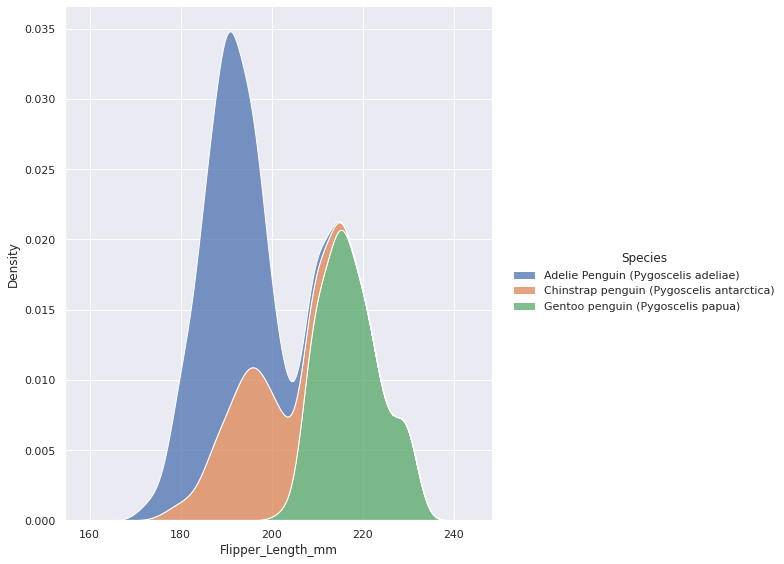

In [329]:
#This is an alternate plot showing the distribution of flipper lengths among the different species of penguins. 
sns.set_theme(style="darkgrid")
sns.displot(data=Penguin_df, x="Flipper_Length_mm", hue="Species", multiple="stack", kind="kde", height=8, aspect=0.9)

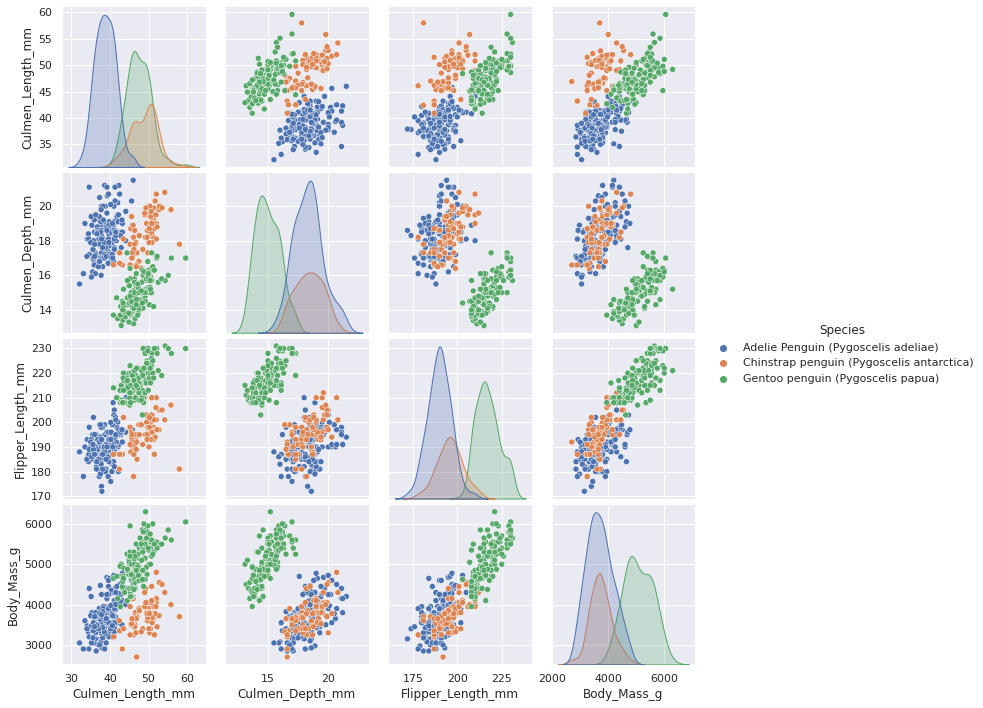

In [330]:
# Dropping 'Sample_Number' column because this data would not contribute to creating useful pairplots.
pairplot_df = Penguin_df.drop(columns=['Sample_Number'])

# Using Seaborn pairplot to create plots of every axes combination of body mass, flipper length, culmen length and culmen depth. 
sns.pairplot(data=pairplot_df, hue="Species")

## Data Visualization Using (only) Matplotlib

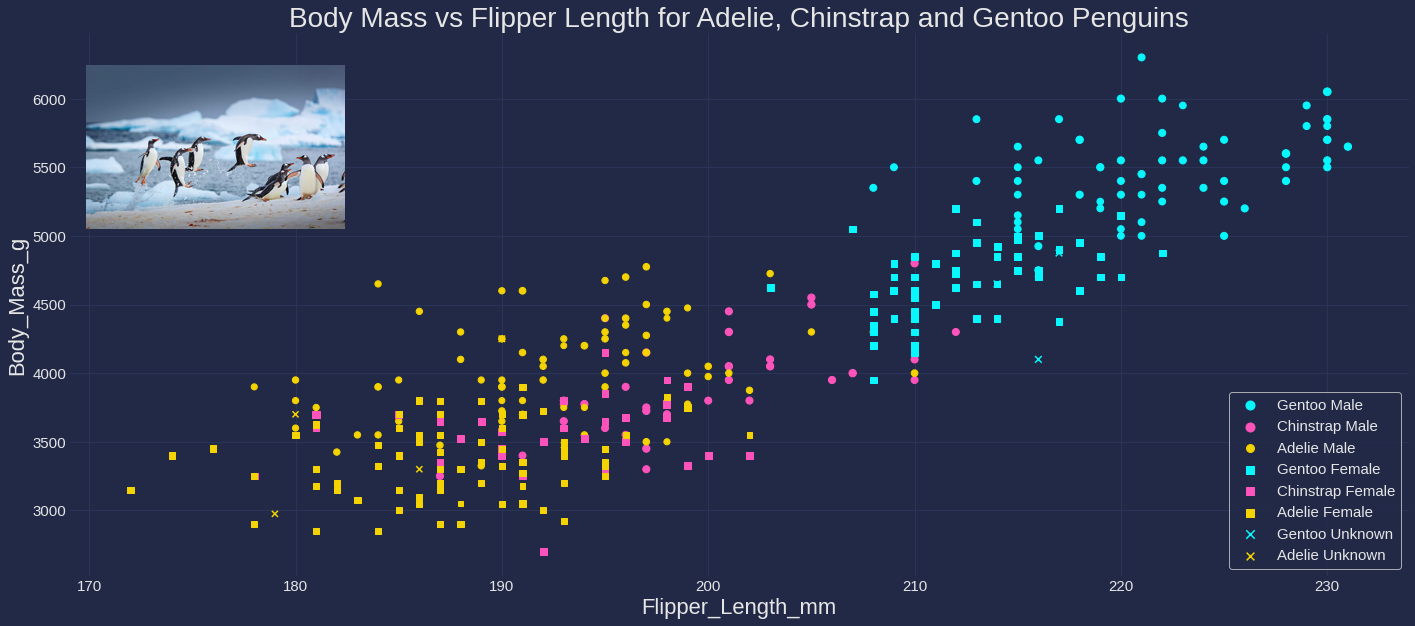

In [331]:
# ----------------------------------------------------------------------------------------------------------------------------------------
# This plot, created with Matplotlib object oriented style, expands upon the MakeoverMonday plot by varying the markertype (shape)
# used for each datapoint based on penguin gender. Adding gender information to the plot allows us to look for additional trends, such as whether 
# or not female penguins tend to have less mass than their male counterparts. Using these trends we can also deduce
# which gender is most likely for observations where the true gender was not recorded (i.e. Look at where in the plot each
# "X" - unknown gender marker type falls, and look at the neighbors). 
#
# -----------------------------------------------------------------------------------------------------------------------------------------
#
# A note on plot width challenges when using pure Matplotlib below: 
# 
# Matplotlib offers several ways to set the size of a figure, for example:
# 1. setting the figsize() parameter when instantiating the figure
# 2. setting the global default rcParam["figure.figsize"]
# 3. using the figure level function fig.set_size_inches()
# However, none of these default figure size interfaces allow the user to take into account the size of the screen currently being used.
# This is a hurdle if you prefer your figures to always fill the width of the screen. One possible work around could be to use a
# outside library to get the screen size, and then perform a calculation to find the appropriate parameters to pass to figsize(),
# however this is also problematic because it is difficult to find a library that will run on all operating systems, and on
# cloud based jupyter notebooks (such as Google Colab) and reliably return the correct screen size. I point this out as an obstacle
# present when using pure Matplotlib. Several other libraries such as Bokeh and Plotly offer easy solutions to this problem.  
# -----------------------------------------------------------------------------------------------------------------------------------------

# Setting the figures style to the custom "cyberpunk" matplotlib style. 
plt.style.use("cyberpunk")

# Creating figure and axis objects to hold the plot. 
fig, ax = plt.subplots(nrows = 1, ncols = 1)

# Setting the figure size
fig.set_size_inches(24,10)

# Adding a title to the figure. 
ax.set_title("Body Mass vs Flipper Length for Adelie, Chinstrap and Gentoo Penguins", fontsize=28)

# Adding x and y axis labels to the figure.
ax.set_xlabel("Flipper_Length_mm", fontsize=22)
ax.set_ylabel("Body_Mass_g", fontsize=22)

# Setting the size of the x and y axis tick parameters
ax.tick_params(axis = 'both', labelsize = 15)

# ---------------------------------------------------------------------------------------------
# Below we separate the Peguin_df dataframe into smaller data frames for each Peguin type
# and gender combination. These will be used for inputs to the Matplotlib scatter function.
# ----------------------------------------------------------------------------------------------
Gentoo_df = Penguin_df[Penguin_df['Species'] == "Gentoo penguin (Pygoscelis papua)"] 
Gentoo_male_df = Gentoo_df[Gentoo_df['Sex'] == "MALE"]
Gentoo_female_df = Gentoo_df[Gentoo_df['Sex'] == "FEMALE"]
Gentoo_sexUnknown_df = Gentoo_df[Gentoo_df['Sex'] == "Missing"]

Chinstrap_df = Penguin_df[Penguin_df['Species'] == "Chinstrap penguin (Pygoscelis antarctica)"]
Chinstrap_male_df = Chinstrap_df[Chinstrap_df['Sex'] == "MALE"]
Chinstrap_female_df = Chinstrap_df[Chinstrap_df['Sex'] == "FEMALE"]

Adelie_df = Penguin_df[Penguin_df['Species'] == "Adelie Penguin (Pygoscelis adeliae)"]
Adelie_male_df = Adelie_df[Adelie_df['Sex'] == "MALE"]
Adelie_female_df = Adelie_df[Adelie_df['Sex'] == "FEMALE"]
Adelie_sexUnknown_df = Adelie_df[Adelie_df['Sex'] == "Missing"]

# ------------------ End dataframe splitting section ------------------------------------------

# Adding datapoints for male penguins of all three species to the scatterplot.
ax.scatter(Gentoo_male_df['Flipper_Length_mm'], Gentoo_male_df['Body_Mass_g'] , s=Gentoo_male_df['Culmen_Length_mm'], label="Gentoo Male", color='#08F7FE')
ax.scatter(Chinstrap_male_df['Flipper_Length_mm'], Chinstrap_male_df['Body_Mass_g'] , s=Chinstrap_male_df['Culmen_Length_mm'], label="Chinstrap Male", color='#FE53BB')
ax.scatter(Adelie_male_df['Flipper_Length_mm'], Adelie_male_df['Body_Mass_g'] , s=Adelie_male_df['Culmen_Length_mm'], label="Adelie Male", color='#F5D300')

# Adding datapoints for female penguins of all three species to the scatterplot.
ax.scatter(Gentoo_female_df['Flipper_Length_mm'], Gentoo_female_df['Body_Mass_g'] , s=Gentoo_female_df['Culmen_Length_mm'], label="Gentoo Female", marker="s", color='#08F7FE')
ax.scatter(Chinstrap_female_df['Flipper_Length_mm'], Chinstrap_female_df['Body_Mass_g'] , s=Chinstrap_female_df['Culmen_Length_mm'], label="Chinstrap Female", marker="s", color='#FE53BB')
ax.scatter(Adelie_female_df['Flipper_Length_mm'], Adelie_female_df['Body_Mass_g'] , s=Adelie_female_df['Culmen_Length_mm'], label="Adelie Female", marker="s", color='#F5D300')

# Adding observations where the sex of the penguin is unknown to the scatterplot. Since there are not any Chinstrap penguin observations where the sex is unknown, only the other
# two penguin species (Gentoo and Adelie) are needed here.
ax.scatter(Gentoo_sexUnknown_df['Flipper_Length_mm'], Gentoo_sexUnknown_df['Body_Mass_g'] , s=Gentoo_sexUnknown_df['Culmen_Length_mm'], label="Gentoo Unknown", marker="x", color='#08F7FE')
ax.scatter(Adelie_sexUnknown_df['Flipper_Length_mm'], Adelie_sexUnknown_df['Body_Mass_g'] , s=Adelie_sexUnknown_df['Culmen_Length_mm'], label="Adelie Unknown", marker="x", color='#F5D300')

# Add a legend to the lower right corner of the figure. 
ax.legend(loc="lower right", prop={'size': 15}, markerscale=1.25, frameon=True, fancybox=True)

# ------------------------------------------------------------------------------------------------------------------------
# This section adds a bit of fun and character to the plot by adding an image of Gentoo Penguins dancing. 
# The image is automatically resized proportional to the figure size, therefore if the figure size is changed
# The image will scale appropriately and remain in its location in the upper left corner of the plot. 
# --------------------------------------------------------------------------------------------------------------------------

# Import the image of dancing penguins
im=Image.open("/content/drive/MyDrive/Programming/Colab Notebooks/Coding_Dojo/Week_3/Dancing_Gentoos.jpg")

# Get the image size in pixels.
image_size = im.size
image_width = im.width
image_height = im.height

# Set a desired proprtion of the figure space to allocate for the image.
fig_width_proportion = 0.15

# Calculate a scale factor to maintain appropriate aspect ratio as image is resized.
scale_factor = (fig.dpi * fig.get_figwidth() * fig_width_proportion) / (image_width)

# Rescale the image width according to the proprotion of the total space we wish to allocate for the image. 
image_scaled_width = int(fig_width_proportion * fig.get_figwidth() * fig.dpi)

# Rescale the image height based on how much the width was scaled and a desire to maintain constant aspect ratio.
image_scaled_height = int(image_height * scale_factor)

# Perform the image resizing. 
resized_image = im.resize((image_scaled_width,image_scaled_height))

# ----- End image resizing ----------

# -------------------------------------------------------------------------------------------------
# This section takes into account the scaled image size to consitently place the image
# in the same relative location in the figure. 
# ------------------------------------------------------------------------------------------
fig_size_inches = fig.get_size_inches()
fig_width_inches = fig.get_figwidth()

fig_pixel_height = fig.dpi * fig.get_figheight() 
fig_pixel_width = fig.dpi * fig.get_figwidth()

x_off = int(0.20 * fig_pixel_width - image_scaled_width)
y_off = int(.78 * fig_pixel_height - image_scaled_height)

# Add the resized image to the figure at the relative location appropriate for this figure size. 
fig.figimage(resized_image, x_off, y_off)

mplcyberpunk.add_glow_effects()
plt.show()


## Data Visualization Using Bokeh

In [332]:
# -----------------------------------------------------------------------------------------------------------------------------------------
# This plot improves upon the Makeover monday plot by adding rich interactivity, see below for a full description of the 
# features, and feel free to click around inside the plot to try it out! 
# -----------------------------------------------------------------------------------------------------------------------------------------

# Specify that the plot will be displayed inline in a Jupyter notebook. 
output_notebook()

# Create a new dataframe column "Species_and_Sex" where the value is simply (species name) + (sex)
# This column is where we will pull the names from to fill our plots legend.
Penguin_df["Species_and_Sex"] = Penguin_df['Species'].str.split().str.get(0) + " " + Penguin_df["Sex"].astype(str)

# Scaling the 'Culmen_Length_mm' column as a convenience, so we yeild more reasonable size markers when
# this column is used to generate the relative size of each data point. 
Penguin_df['Culmen Length Float'] = Penguin_df['Culmen_Length_mm'].astype(float) * 0.3

# Create the Bokeh data structure "ColumnDataSource" which will be used to pull data from when generating plots.
penguin_source = ColumnDataSource(Penguin_df)

# Lists of sex categories and the associated marker type we wish to assign to each.
SEX_CATEGORIES = ['MALE', 'FEMALE', 'Missing']
MARKER_TYPES = ["circle", "square", "x"]

# Lists of species categories and the associated marker color we wish to assign to each.
SPECIES_CATEGORIES = ["Adelie Penguin (Pygoscelis adeliae)", "Gentoo penguin (Pygoscelis papua)", "Chinstrap penguin (Pygoscelis antarctica)"]
COLORS= ['#F5D300', '#08F7FE', '#FE53BB']

# String containing names of all the different tools we want the plot to have.
# This will be passed as a parameter when instantiating the figure.
TOOLS="poly_select,lasso_select,wheel_zoom,pan,box_zoom,tap,reset,save"

# String specifying the title of the plot. This will be passed as a parameter when instantiating the figure.
TITLE = "Body Mass vs Flipper Length for Adelie, Chinstrap and Gentoo Penguins."

# Instantiate the figure 
p = figure(title=TITLE, tools=TOOLS)

# Specify all of the columns in the "ColumnDataSource" data structure that we wish to display values for when hovering over a particular data point.
TOOLTIPS=[("Species", "@Species"), ("Culmen Length", "@Culmen_Length_mm"), ('Culmen Depth', '@Culmen_Depth_mm'), ('Flipper Length', '@Flipper_Length_mm'), ('Body Mass', '@Body_Mass_g'),
          ("Sex", "@Sex"), ("Region", "@Region"), ("Island","@Island")]

# Instantiate and add our hover tool to the plot, and pass the list of columns we want the hover tool to know about.
hover = HoverTool(tooltips=TOOLTIPS)
p.add_tools(hover)

# Update various plot labels and color attributes.
p.title.text_font_size = '24pt'
p.xaxis.axis_label = 'Flipper Length'
p.xaxis.axis_label_text_font_size = '22pt'
p.yaxis.axis_label = 'Body Mass'
p.yaxis.axis_label_text_font_size = '22pt'
p.background_fill_color = "#212946"

# Have plot automically stretch to whatever width is available in the current window. Don't allow vertical stretching. (This is so much harder in Matplotlib!!)
p.sizing_mode = 'stretch_width'

# Create the scatter plot of penguin Body Mass vs Flipper Length. 
p.scatter("Flipper_Length_mm", "Body_Mass_g", source=penguin_source, fill_alpha=0.8, size='Culmen Length Float', marker=factor_mark('Sex', MARKER_TYPES, SEX_CATEGORIES), 
         color=factor_cmap('Species', COLORS, SPECIES_CATEGORIES), legend_field="Species_and_Sex")

# Specify the colors, location, and formatting for the plots legend.
p.legend.location = "top_left"
p.legend.background_fill_color = "#bababa"
p.legend.label_text_font_style = "bold"
p.legend.label_text_color = "black"
p.legend.glyph_height = 25
p.legend.glyph_width = 25
p.legend.border_line_color = "black"
p.legend.border_line_alpha = 0.7
p.legend.border_line_width = 9.0

# display the plot. 
show(p)

# ----------------------------  OVERVIEW OF THE PLOT TOOLBAR FUNCTIONS (LOCATED ON THE RIGHT SIDE OF THE PLOT) ----------------------------

# Note: Don't forget to play with these! 

# Toolbar allows for rich interactive plots, see below for a brief description of the tools provided.
# pan: Hold a left click and move the mouse to move the plot window without changing the plots aspect ratio. 
# poly_select: Define an arbitrary polygonal selection region by left clicking at the desired verticies of the polygon.
# lasso_select: Similar to above, except selection is done by left clicking and dragging rather than single clicks at verticies. 
# box_zoom: Hold left click and drag over an area of the plot to be automically zoomed into that area. 
# wheel_zoom: Use the mouse scroll wheel to zoom in and out within the plot. 
# tap: Select single points within the plot (all others fade into the background) with left clicks on the data points
# reset: Restore the plot to its original view. 
# save: Downloads the plot to your local machine. 
# hover: toggles on and off feature that displays additional information when hovering over a data point. 

# --------------------------------------------------------------------------------------------------------------------------------------------------